Logistic Regression on Building_01 Data from T_315500_234500_NW.bin

Not Completed Yet
 
For Reference: https://elitedatascience.com/imbalanced-classes

In [1]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm


In [2]:
#Reading CSV File, Building_01, which is actually building_0000 
df = pd.read_csv('building_01.csv', names = ['X','Y','Z','R','G','B','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification'])
#df1 = df.dropna() 
#df2 = df1.values

#print(df2[:, 14])
from sklearn.utils import resample 
df_majority = df[df.Classification == 2]
df_minority = df[df.Classification == 4] 

#print(df_majority)
#downsampling majority class 

df_majority_downsampled = resample(df_majority, replace = False, n_samples = 235519, random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

#display class counts 
df_downsampled.Classification.value_counts()


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2    235519
4    235519
Name: Classification, dtype: int64

In [3]:
#df = pd.read_csv('building_01_small.csv', names = ['X','Y','Z','R','G','B','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification'])
df = pd.read_csv('building_01_small.csv')
df1 = df.dropna() 
df2 = df1.values
print(df2)

[[ 3.15705838e+05  2.34844175e+05  2.76940002e+01  1.70000000e+02
   0.00000000e+00  2.55000000e+02  1.10000000e+01 -3.10000000e+01
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   3.91898754e+05  3.25000000e+02  2.00000000e+00]
 [ 3.15705948e+05  2.34844287e+05  2.76910000e+01  1.70000000e+02
   0.00000000e+00  2.55000000e+02  1.10000000e+01 -3.10000000e+01
   0.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   3.91898754e+05  2.86000000e+02  2.00000000e+00]
 [ 3.15706069e+05  2.34844410e+05  2.76860008e+01  1.70000000e+02
   0.00000000e+00  2.55000000e+02  1.10000000e+01 -3.10000000e+01
   0.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   3.91898754e+05  2.76000000e+02  2.00000000e+00]
 [ 3.15706157e+05  2.34844499e+05  2.76259994e+01  1.70000000e+02
   0.00000000e+00  2.55000000e+02  1.10000000e+01 -3.10000000e+01
   0.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   3.91898754e+05  1.05000000e+02  2.00000000e+00]
 [ 3

In [4]:
#Reading CSV File #2, Building_0000001 txt 
df_a = pd.read_csv('Buildings_000001.txt',sep = ' ')
df_a1 = df_a.dropna() 
df_a2 = df_a1.values

In [5]:
'''
#CELL ISN'T USED
#Checking to see if everything is working 
#df.info()
#df.head(3)
classifier_count = df['Classification'].value_counts().to_frame()
classifier_count.head(2)

#df_a.info()
#df_a.head(3)
'''

"\n#CELL ISN'T USED\n#Checking to see if everything is working \n#df.info()\n#df.head(3)\nclassifier_count = df['Classification'].value_counts().to_frame()\nclassifier_count.head(2)\n\n#df_a.info()\n#df_a.head(3)\n"

In [6]:
#For edited CSV 
x = df2[:, :14] 
y = df2[:, 14]
print(x.shape, y.shape)

(19, 14) (19,)


In [7]:
#without upsampling
#I will use all the attributes (building_000000 CSV)
#x = df2[:, :14] 
#y = df2[:, 14]

#with upsampling 
#x = df_downsampled.drop('Classification', axis = 1)
#print(x)
#y = df_downsampled.Classification
#print(y)
#print(x.shape,y.shape)

In [8]:
#For building 000001
x1 = df_a2[:, :14] 
y1 = df_a2[:, 14] 

In [9]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

#Making sure that 
y_train=y_train.astype('int')
y_test = y_test.astype('int')
print(x_train.shape, x_test.shape)
print(y_train)

(14, 14) (5, 14)
[2 2 2 2 2 2 2 2 2 2 4 4 2 2]


In [16]:
#SVM

print("hi")
from sklearn import svm
cVals = [ 1, 10, 1000]

acc_train_svm_linear = []
acc_test_svm_linear = []
print("hi")
#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))
#print("Train Accuracy: ",acc_train_linear)

hi
hi
Train Accuracy using a Linear kernel
Train Accuracy(c=1): 1.0
Train Accuracy(c=10): 1.0
Train Accuracy(c=1000): 1.0


In [11]:
#Logistic Regression 
logreg = LogisticRegression(C=1000).fit(x_train,y_train)
yhat_train = logreg.predict(x_train)
print(np.unique(yhat_train))
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy for Train Data:",accuracy_train)

yhat_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy for Test Data:",accuracy_test)


[2 4]
Accuracy for Train Data: 1.0
Accuracy for Test Data: 0.8


In [12]:
'''
#Logistic Regression 
logreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)
#print(yhat_train)

#finding accuracy of applying model on training data
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy on train set:",accuracy_train)

#finding accuracy of applying model on test data 
yhat_test = logreg.predict(x_test)
#print(yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test set:",accuracy_test)
'''

'\n#Logistic Regression \nlogreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization\nlogreg.fit(x_train, y_train)\nyhat_train = logreg.predict(x_train)\n#print(yhat_train)\n\n#finding accuracy of applying model on training data\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy on train set:",accuracy_train)\n\n#finding accuracy of applying model on test data \nyhat_test = logreg.predict(x_test)\n#print(yhat_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy on test set:",accuracy_test)\n'

In [13]:
#finding accuracy of applying model to a different building 
yhat_building_000001 = logreg.predict(x1)
print(yhat_building_000001)
accuracy_building_000001 = accuracy_score(y1, yhat_building_000001)
print("Accuracy on a different building (01):",accuracy_building_000001)

[2 2 2 ... 2 2 2]
Accuracy on a different building (01): 0.771869780686143


In [14]:
#Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label=2)
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)


Coefficient: [[-1.37837114 -3.4684591  -1.42012113  0.          0.          0.
   0.         -1.38815344  0.65927274  0.          0.          0.
  -5.57865672 -2.83758647]]
Intercept: [-6.21770801]
Precision: 1.0
Recall: 1.0
Fscore: 1.0


Confusion matrix, without normalization
[[3 1]
 [0 1]]
Normalized confusion matrix
[[0.75 0.25]
 [0.   1.  ]]


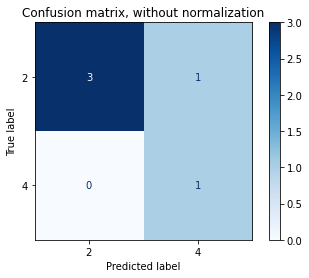

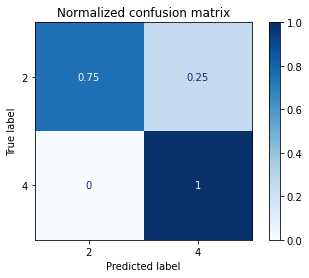

In [15]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()